# Closest Pair of Points using Divide and Conquer algorithm

We are given an array of n points in the plane, and the problem is to find out the closest pair of points in the array. This problem arises in a number of applications. For example, in air-traffic control, you may want to monitor planes that come too close together, since this may indicate a possible collision. Recall the following formula for distance between two points p and q.

In [1]:
from IPython.display import Image

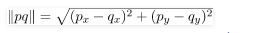

In [2]:
Image('div1.png')

The Brute force solution is O(n^2), compute the distance between each pair and return the smallest. We can calculate the smallest distance in O(nLogn) time using Divide and Conquer strategy.

### Algorithm 
Following are the detailed steps of a O(n (Logn)^2) algorithm. 
#### Input: An array of n points P[] 
Output: The smallest distance between two points in the given array.
As a pre-processing step, the input array is sorted according to x coordinates.<br>
1) Find the middle point in the sorted array, we can take P[n/2] as middle point. <br>
2) Divide the given array in two halves. The first subarray contains points from P[0] to P[n/2]. The second subarray contains points from P[n/2+1] to P[n-1].<br>
3) Recursively find the smallest distances in both subarrays. Let the distances be dl and dr. Find the minimum of dl and dr. Let the minimum be d

In [3]:
Image('mindis.png')

4) From the above 3 steps, we have an upper bound d of minimum distance. Now we need to consider the pairs such that one point in pair is from the left half and the other is from the right half. Consider the vertical line passing through P[n/2] and find all points whose x coordinate is closer than d to the middle vertical line. Build an array strip[] of all such points. 

In [4]:
Image('closepair.png')

5) Sort the array strip[] according to y coordinates. This step is O(nLogn). It can be optimized to O(n) by recursively sorting and merging. <br>
6) Find the smallest distance in strip[]. This is tricky. From the first look, it seems to be a O(n^2) step, but it is actually O(n). It can be proved geometrically that for every point in the strip, we only need to check at most 7 points after it (note that strip is sorted according to Y coordinate). See this for more analysis.<br>
7) Finally return the minimum of d and distance calculated in the above step (step 6)



In [5]:
import math
import copy
# A class to represent a Point in 2D plane
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
 
# A utility function to find the
# distance between two points
def dist(p1, p2):
    return math.sqrt((p1.x - p2.x) *
                     (p1.x - p2.x) +
                     (p1.y - p2.y) *
                     (p1.y - p2.y))
 
# A Brute Force method to return the
# smallest distance between two points
# in P[] of size n
def bruteForce(P, n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i + 1, n):
            if dist(P[i], P[j]) < min_val:
                min_val = dist(P[i], P[j])
 
    return min_val
 
# A utility function to find the
# distance between the closest points of
# strip of given size. All points in
# strip[] are sorted according to
# y coordinate. They all have an upper
# bound on minimum distance as d.
# Note that this method seems to be
# a O(n^2) method, but it's a O(n)
# method as the inner loop runs at most 6 times
def stripClosest(strip, size, d):
     
    # Initialize the minimum distance as d
    min_val = d
 
    
    # Pick all points one by one and
    # try the next points till the difference
    # between y coordinates is smaller than d.
    # This is a proven fact that this loop
    # runs at most 6 times
    for i in range(size):
        j = i + 1
        while j < size and (strip[j].y -
                            strip[i].y) < min_val:
            min_val = dist(strip[i], strip[j])
            j += 1
 
    return min_val
 
# A recursive function to find the
# smallest distance. The array P contains
# all points sorted according to x coordinate
def closestUtil(P, Q, n):
     
    # If there are 2 or 3 points,
    # then use brute force
    if n <= 3:
        return bruteForce(P, n)
 
    # Find the middle point
    mid = n // 2
    midPoint = P[mid]
 
    #keep a copy of left and right branch
    Pl = P[:mid]
    Pr = P[mid:]
 
    # Consider the vertical line passing
    # through the middle point calculate
    # the smallest distance dl on left
    # of middle point and dr on right side
    dl = closestUtil(Pl, Q, mid)
    dr = closestUtil(Pr, Q, n - mid)
 
    # Find the smaller of two distances
    d = min(dl, dr)
 
    # Build an array strip[] that contains
    # points close (closer than d)
    # to the line passing through the middle point
    stripP = []
    stripQ = []
    lr = Pl + Pr
    for i in range(n):
        if abs(lr[i].x - midPoint.x) < d:
            stripP.append(lr[i])
        if abs(Q[i].x - midPoint.x) < d:
            stripQ.append(Q[i])
 
    stripP.sort(key = lambda point: point.y) #<-- REQUIRED
    min_a = min(d, stripClosest(stripP, len(stripP), d))
    min_b = min(d, stripClosest(stripQ, len(stripQ), d))
     
     
    # Find the self.closest points in strip.
    # Return the minimum of d and self.closest
    # distance is strip[]
    return min(min_a,min_b)
 
# The main function that finds
# the smallest distance.
# This method mainly uses closestUtil()
def closest(P, n):
    P.sort(key = lambda point: point.x)
    Q = copy.deepcopy(P)
    Q.sort(key = lambda point: point.y)   
 
    # Use recursive function closestUtil()
    # to find the smallest distance
    return closestUtil(P, Q, n)
 
# Driver code
P = [Point(2, 3), Point(12, 30),
     Point(40, 50), Point(5, 1),
     Point(12, 10), Point(3, 4)]
n = len(P)
print("The smallest distance is",
                   closest(P, n))

The smallest distance is 1.4142135623730951
